# Tratamento de Dados Radioativos

Importação das bibliotecas utilizadas

In [237]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Leitura de arquivos contendo os dados

In [238]:
enviroment = open('enviroment.txt')
radioactive_source = open('radioactive_source.txt')
uranite = open('uranite.txt')

split dos dados

In [239]:
for text in enviroment:
    data_env = map(int,text.split())

In [240]:
for text in radioactive_source:
    data_rad = map(int,text.split())

In [241]:
for text in uranite:
    data_ura = map(int,text.split())

Transformando dados em um único dataframe

In [242]:
data_dose = {'enviroment':data_env, 'radioactive_source':data_rad, 'uranite':data_ura}

In [243]:
dataf_dose = pd.DataFrame(data_dose)


In [244]:
dataf_dose.head()

,enviroment,radioactive_source,uranite
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,7,4,7


Tempo de execução de cada dose

In [245]:
t_enviroment = 1200 #seconds
t_radioactive_source = 120 #seconds
t_uranite = 600 #seconds

Transformação dos tempos em um dataframe

In [246]:
data_time = {'enviroment':np.linspace(0, t_enviroment, len(data['enviroment'])),
             'radioactive_source':np.linspace(0,t_radioactive_source, len(data['radioactive_source'])),
             'uranite':np.linspace(0,t_uranite, len(data['uranite']))}

In [247]:
dataf_time = pd.DataFrame(data_time)

In [248]:
dataf_time.head()

,enviroment,radioactive_source,uranite
0,0.000000,0.000000,0.000000
1,1.173021,0.117302,0.586510
2,2.346041,0.234604,1.173021
3,3.519062,0.351906,1.759531
4,4.692082,0.469208,2.346041


Gráficos de doses para cada espectro

In [249]:
row_names = dataf_dose.columns

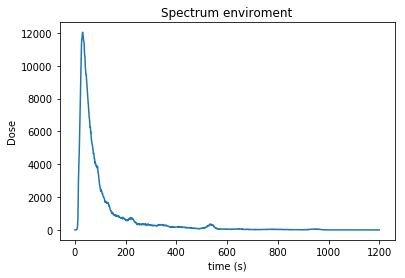

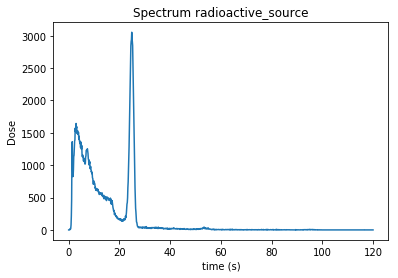

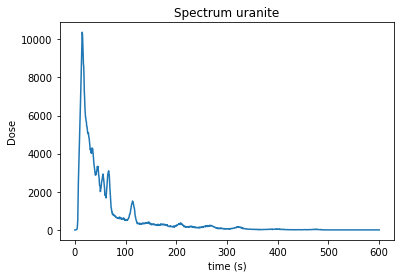

In [250]:
for row_name in row_names:
    plt.plot(dataf_time[row_name],dataf_dose[row_name])
    plt.title('Spectrum ' + row_name)
    plt.xlabel('time (s)')
    plt.ylabel('Dose')
    plt.show()
    data_dose[row_name]=np.array(data_dose[row_name])

# Encontrado Intervalos de Máximo

## Taxa de Dose Ambiente

Intervalos para encontrar máximo

In [251]:
t_analyse = [0, 200, 250, 400, 600, 1200]
dose_max = []
for i in range(len(t_analyse)-1):
    dose_max+=[np.amax(data_dose['enviroment'][np.logical_and(t_analyse[i]<data_dose['enviroment'], \
                                                              data_dose['enviroment']<=t_analyse[i+1])])]
dose_max

[200, 250, 390, 598, 1173]

## Taxa de Dose da Fonte Radioativa

Intervalos para encontrar máximo

In [252]:
t_analyse = [0,20, 25, 40, 60, 100, 200, 250, 350, 600]
dose_max = []
for i in range(len(t_analyse)-1):
    dose_max+=[np.amax(data_dose['radioactive_source'][np.logical_and(t_analyse[i]<data_dose['radioactive_source'], \
                                                              data_dose['radioactive_source']<=t_analyse[i+1])])]
dose_max

[20, 25, 40, 60, 82, 197, 236, 343, 589]

## Taxa de Dose da Uranita

Intervalos para encontrar máximo

In [235]:
t_analyse = [0,20, 25, 40, 60, 100, 200, 250, 350, 600]
dose_max = []
for i in range(len(t_analyse)-1):
    dose_max+=[np.amax(data_dose['uranite'][np.logical_and(t_analyse[i]<data_dose['uranite'], \
                                                              data_dose['uranite']<=t_analyse[i+1])])]
dose_max

[20, 25, 40, 60, 100, 199, 250, 345, 600]